# Week 5 - Regression models

Hello again. Welcome to week 5! In this week, we will focus on how to model continuous response (or target) variables in STAN.

The usual imports...

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# fix random generator seed (for reproducibility of results)
np.random.seed(42)

# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

## Part 1 - Linear regression - Ancestral sampling

In this first part, we will look at a Bayesian linear regression model. Particularly, we shall try to understand it better (e.g. its assumptions, modelling choices, etc.) by sampling from the model using ancestral sampling.

We start by creating N data points corresponding to the inputs (X). Of course, these are assumed to be always given (i.e. we do not model them explicitly)! In this case, we use a simple normal distribution to generate some artificial X's.

In [2]:
# X's are fixed (1D points)
X = np.random.normal(0.3, 1, size=20)[:,np.newaxis] # 20 points
N, D = X.shape
print("Vector of", N, "x", D)
print(X)

Vector of 20 x 1
[[ 0.79671415]
 [ 0.1617357 ]
 [ 0.94768854]
 [ 1.82302986]
 [ 0.06584663]
 [ 0.06586304]
 [ 1.87921282]
 [ 1.06743473]
 [-0.16947439]
 [ 0.84256004]
 [-0.16341769]
 [-0.16572975]
 [ 0.54196227]
 [-1.61328024]
 [-1.42491783]
 [-0.26228753]
 [-0.71283112]
 [ 0.61424733]
 [-0.60802408]
 [-1.1123037 ]]


Now that we have the X's, it is time to sample from our Bayesian linear regression model using ancestral sampling. In ancestral sampling, we sample from each of the variables in turn, following the generative process of the model. In this case, we assume our model to have an intercept $\alpha$ and a 1D slope $\beta$. The generative process is as follows:

1. Draw intercept $\alpha \sim \mathcal{N}(0,1)$

2. Draw slope $\beta \sim \mathcal{N}(0,1)$

3. For each input point $x_n$:

    A. Draw target $y_n \sim \mathcal{N}(\alpha + \beta * x_n, \sigma^2)$


In [3]:
# we assume sigma to be fixed
sigma = 0.1
print("sigma:", sigma)

sigma: 0.1


Please perform ancestral sampling of the model described above:

In [4]:
# sample intercept (alpha)
alpha = np.random.normal(0,1)
print("alpha:", alpha)

# sample coefficients (beta)
beta = np.random.normal(0,1,size=D)
print("beta:", beta)

# sample observations (y's)
y = np.zeros(N)
for n in range(N):
    y[n] = np.random.normal(alpha + beta * X[n], sigma)
    print("y[%d]: %.3f" % (n, y[n]))

alpha: 1.465648768921554
beta: [-0.2257763]
y[0]: 1.293
y[1]: 1.287
y[2]: 1.197
y[3]: 1.065
y[4]: 1.336
y[5]: 1.488
y[6]: 0.981
y[7]: 1.195
y[8]: 1.444
y[9]: 1.461
y[10]: 1.501
y[11]: 1.397
y[12]: 1.426
y[13]: 1.708
y[14]: 1.808
y[15]: 1.329
y[16]: 1.494
y[17]: 1.347
y[18]: 1.677
y[19]: 1.734


Now that we have sampled some outputs, lets look at them and compare them with the underlying regression line defined by the sampled values of $\alpha$ and $\beta$. 

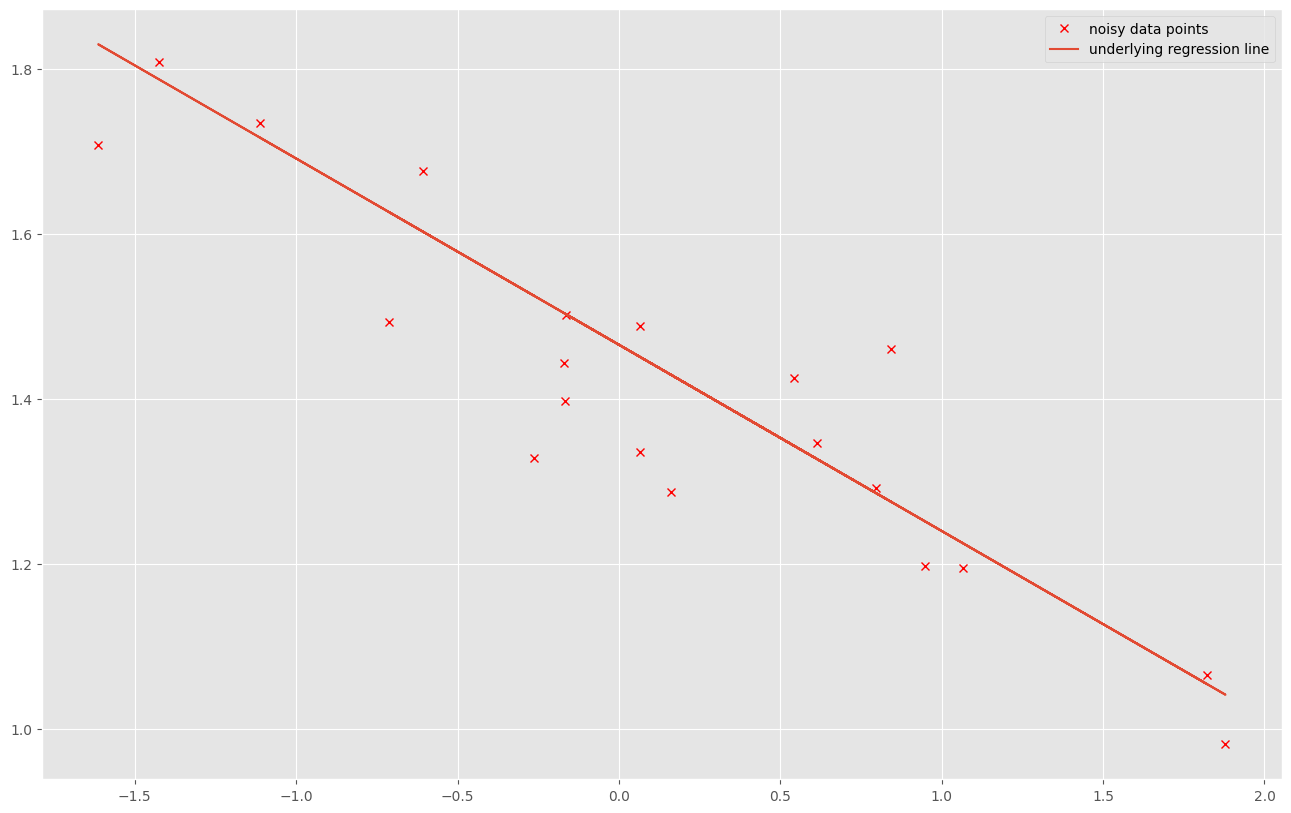

In [5]:
plt.plot(X, y, "rx")
plt.plot(X, alpha + beta * X)
plt.legend(["noisy data points", "underlying regression line"])
plt.show()

Notice how the different observed y's are scattered around the (true) underlying regression line. 

Try running the ancestral sampling code multiple times and look at how your results differ. Notice how, depending on the values of $\alpha$ and $\beta$ that you sample, the N sampled targets $\{y_n\}_{n=1}^N$ vary dramatically. In the next sections/parts of this notebook, we will do inference in the Bayesian linear regression model (using STAN!), where the goal is to reverse this process, i.e. given the observed values of $y$, compute the posterior distribution of $\alpha$ and $\beta$. But more on that later...

For now, go back to the ancestral samplig code and play with the parameters. Specifically, try changing the values of $\sigma^2$ and look at the consequence in the generated targets y.

